# **1. Data Preprocessing ✅**

In [18]:
import pandas as pd
# Load the data
data = pd.read_csv('/content/saudi_aramco_data.csv')

In [19]:
# Display the first 5 rows of the dataset
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-11,29.090908,29.090908,29.090908,29.090908,24.556959,38289394
1,2019-12-12,31.983471,31.983471,29.752066,30.413223,25.673187,505692621
2,2019-12-15,30.661158,30.991735,30.413223,30.909090,26.091770,98349281
3,2019-12-16,30.991735,31.487602,30.991735,31.404959,26.510353,105973907
4,2019-12-17,31.446280,31.528925,30.991735,31.198347,26.335951,142672245


In [20]:
# Convert the date column to datetime format
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [21]:
# Summary statistics of the dataset
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1.164000e+03
mean,30.502389,30.685119,30.314931,30.505042,28.200972,1.042249e+07
std,2.769039,2.801027,2.715085,2.756249,3.361246,2.646719e+07
min,22.314049,23.388430,22.314049,22.975206,19.394417,0.000000e+00
25%,28.836777,28.925619,28.680785,28.818180,25.978118,3.853885e+06
50%,29.628099,29.793388,29.504131,29.669420,27.945249,6.453034e+06
75%,32.349998,32.560226,32.200001,32.400002,31.083448,1.174389e+07
max,38.636364,39.409088,38.363636,38.636364,35.543354,6.562831e+08


In [22]:
# Select the 'Adj Close' column for prediction
data = data[['Adj Close']]

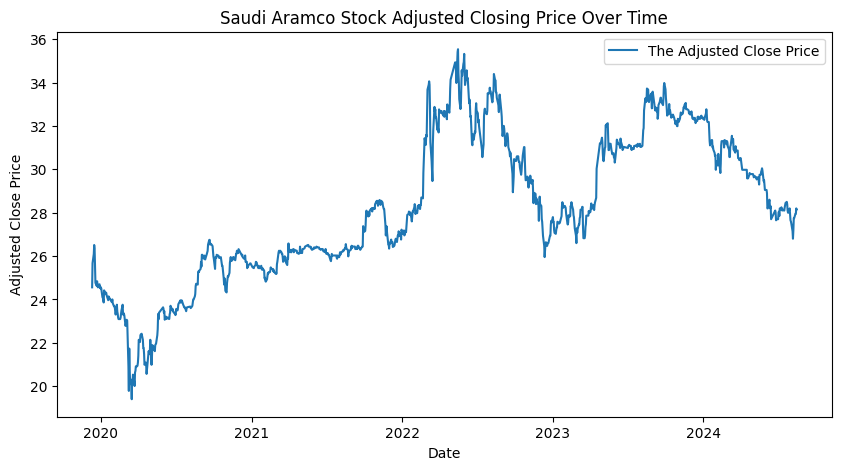

In [25]:
import matplotlib.pyplot as plt
# Plotting the adjusted closing price over time
plt.figure(figsize=(10, 5))
plt.plot(data['Adj Close'], label='The Adjusted Close Price')
plt.title('Saudi Aramco Stock Adjusted Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

In [26]:
from sklearn.preprocessing import MinMaxScaler
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Split the data into 80% for training and 20% testing sets
train_size = int(len(scaled_data) * 0.8)
train, test = scaled_data[:train_size], scaled_data[train_size:]

import numpy as np
# Function to generate the training sequences
def sequences(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        X.append(a)
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

# Set the time step
time_step = 60
X_train, y_train = sequences(train, time_step)
X_test, y_test = sequences(test, time_step)

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# **2. LSTM Model ✅**

In [28]:
import tensorflow as tf

# Create an LSTM model
model = tf.keras.models.Sequential()
# Add the first LSTM layer with 50 units and return sequences
model.add(tf.keras.layers.LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
# Dropout layer to prevent overfitting
model.add(tf.keras.layers.Dropout(0.2))
# Add a second LSTM layer
model.add(tf.keras.layers.LSTM(units=50, return_sequences=False))
# Dropout layer to prevent overfitting
model.add(tf.keras.layers.Dropout(0.2))
# Add the output layer to predict the next price
model.add(tf.keras.layers.Dense(units=1))

# Compile and train the model with Adam optimizer and mean squared error loss
model.compile(optimizer='adam', loss='mean_squared_error')
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - loss: 0.1021
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0101
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0061
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0057
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - loss: 0.0052
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 0.0058
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0051
Epoch 8/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 0.0048
Epoch 9/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0046
Epoch 10/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - loss: 0.0044
Epoch 11/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - loss: 0.0049
Epoch 12/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0047
Epoch 13/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 0.0052
Epoch 14/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0048
Epoch 15/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - lo

# **3. Make Predictions and Plot the Results ✅**

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


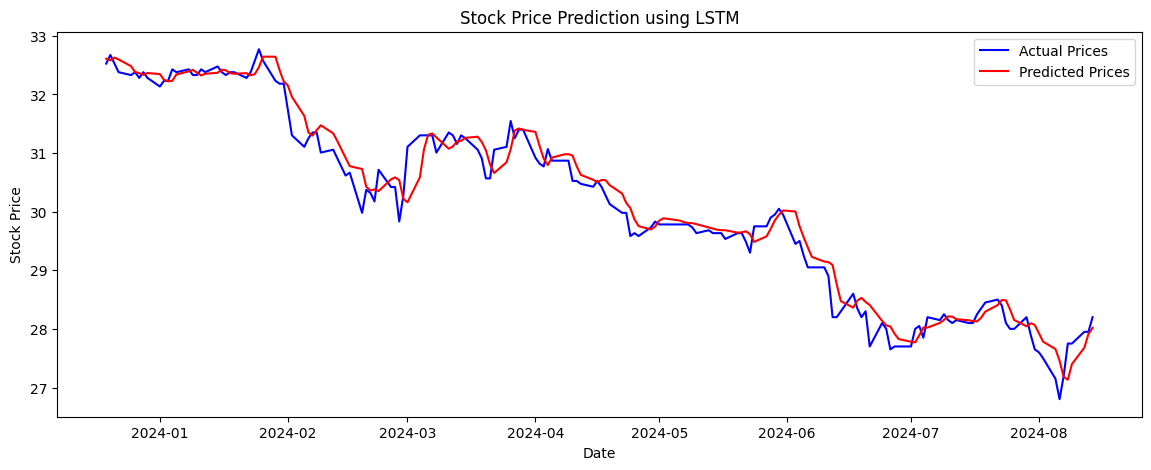

In [43]:
# Make predictions
y_pred = model.predict(X_test)

# Inverse transform the predictions
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(14, 5))
plt.plot(data.index[-len(y_test_inv):], y_test_inv, label='Actual Prices', color='blue')
plt.plot(data.index[-len(y_pred_inv):], y_pred_inv, label='Predicted Prices', color='red')
plt.title('Stock Price Prediction using LSTM')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# **4. Evaluate Model Performance ✅**

In [58]:
# Calculate RMSE
rmse = np.sqrt(np.mean((y_pred_inv - y_test_inv) ** 2))

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# Calculate MAE
mae = mean_absolute_error(y_test_inv, y_pred_inv)
# Calculate MAPE
mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv) * 100

# Display the results
print(f"LSTM Model Evaluation Metrics:\n"
      f"{'-' * 30}\n"
      f"MAE : {mae:.5f}\n"
      f"RMSE : {rmse:.4f}\n"
      f"MAPE : {mape:.4f}%\n"
      f"{'-' * 30}")

LSTM Model Evaluation Metrics:
------------------------------
MAE : 0.20013
RMSE : 0.2714
MAPE : 0.6725%
------------------------------
